Únicamente puedes utilizar las siguientes librerías:

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

## Parte 1
Explora la documentación de glob y realiza los siguientes ejercicios. Utiliza los datos compartidos en la clase del 10 de septiembre (data_sept_10.zip)
https://docs.python.org/es/3/library/glob.html

### 1.1 Regresa una lista con todos los archivos con el formato 'tmix_hora_L1'

In [2]:
paths = glob('../data/*-tmix_hora_L1*')   #Los * indican lo que sea antes o despues segun donde esten colocados
paths

['../data/2022-ene-tmix_hora_L1.csv',
 '../data/2022-abr-tmix_hora_L1.csv',
 '../data/2018-02-tmix_hora_L1.csv',
 '../data/2019-03-tmix_hora_L1.csv',
 '../data/2022-may-tmix_hora_L1.csv',
 '../data/2016-09-tmix_hora_L1.csv',
 '../data/2021-02-tmix_hora_L1.csv',
 '../data/2019-07-tmix_hora_L1.csv',
 '../data/2016-05-tmix_hora_L1.csv',
 '../data/2016-04-tmix_hora_L1.csv',
 '../data/2022-feb-tmix_hora_L1.csv',
 '../data/2017-03-tmix_hora_L1.csv',
 '../data/2022-dic-tmix_hora_L1.csv',
 '../data/2022-ago-tmix_hora_L1.csv',
 '../data/2022-mar-tmix_hora_L1.csv',
 '../data/2022-jun-tmix_hora_L1.csv',
 '../data/2017-08-tmix_hora_L1.csv',
 '../data/2019-04-tmix_hora_L1.csv',
 '../data/2022-jul-tmix_hora_L1.csv',
 '../data/2021-03-tmix_hora_L1.csv']

### 1.2 Regresa una lista que contenga únicamente los archivos que corresponden al año 2022

In [3]:
tmix_paths = glob('../data/2022*')   #Los * indican lo que sea antes o despues segun donde esten colocados
tmix_paths

['../data/2022-ene-tmix_hora_L1.csv',
 '../data/2022-abr-tmix_hora_L1.csv',
 '../data/2022-may-tmix_hora_L1.csv',
 '../data/2022-feb-tmix_hora_L1.csv',
 '../data/2022-dic-tmix_hora_L1.csv',
 '../data/2022-ago-tmix_hora_L1.csv',
 '../data/2022-mar-tmix_hora_L1.csv',
 '../data/2022-jun-tmix_hora_L1.csv',
 '../data/2022-jul-tmix_hora_L1.csv']

### 1.3 El conjunto de datos contiene tres archivos con el mes marzo como valor numérico, es decir, "03". Regresa una lista que contenga estos tres archivos


In [4]:
paths = glob('../data/*-03-*')   #Los * indican lo que sea antes o despues segun donde esten colocados
paths

['../data/2019-03-tmix_hora_L1.csv',
 '../data/2017-03-tmix_hora_L1.csv',
 '../data/2021-03-tmix_hora_L1.csv']

### 1.4 Agrega a la lista anterior el archivo de marzo correspondiente al año 2022. No sólo escribas de manera explícita el string del archivo...

In [5]:
paths_marzo = glob('../data/*-03-*') + (glob('../data/*-mar-*'))   #Los * indican lo que sea antes o despues segun donde esten colocados
paths_marzo

['../data/2019-03-tmix_hora_L1.csv',
 '../data/2017-03-tmix_hora_L1.csv',
 '../data/2021-03-tmix_hora_L1.csv',
 '../data/2022-mar-tmix_hora_L1.csv']

## Parte 2
Continuemos con la última lista creada, en el punto 1.4. Nuestro objetivo final será tener un dataframe con cada uno de los meses marzo para cada año. El índice será una secuencia numérica de 0 hasta el total de datos horarios de un típico mes de marzo, y cada una de las columnas será la variable "WSpeed_Avg" correspondiente al mes de marzo para cada año, deben ser nombrados como "WS_marzo_2017", "WS_mar_2019"...

Para lo anterior sigue los siguientes pasos:

### 2.1 Crea una función para leer cada uno de los archivos de interés. Recuerda que sólo nos interesa la variable "WSpeed_Avg"

In [6]:
def importa_marzo(path):
    file = pd.read_csv(path,
                   encoding = 'unicode_escape',
                    skiprows=[0,1,2,3,4,5,7],
                   usecols=[0,3],
                   index_col=0,
                    parse_dates = True
                  )
    return file

### 2.2 Utiliza una list comprehension para leer los archivos de la lista que creamos en 1.4.

In [7]:
lista_df = [importa_marzo(path) for path in paths_marzo]
lista_df

[                     WSpeed_Avg
 TIMESTAMP                      
 2019-03-01 00:00:00       1.018
 2019-03-01 01:00:00       2.514
 2019-03-01 02:00:00       1.638
 2019-03-01 03:00:00       3.064
 2019-03-01 04:00:00       2.423
 ...                         ...
 2019-03-31 19:00:00       2.920
 2019-03-31 20:00:00       2.759
 2019-03-31 21:00:00       2.594
 2019-03-31 22:00:00       1.536
 2019-03-31 23:00:00       1.751
 
 [744 rows x 1 columns],
                      WSpeed_Avg
 TIMESTAMP                      
 2017-03-01 00:00:00       1.609
 2017-03-01 01:00:00       3.219
 2017-03-01 02:00:00       1.904
 2017-03-01 03:00:00       2.456
 2017-03-01 04:00:00       2.089
 ...                         ...
 2017-03-31 19:00:00       3.267
 2017-03-31 20:00:00       2.688
 2017-03-31 21:00:00       3.001
 2017-03-31 22:00:00       1.220
 2017-03-31 23:00:00       1.668
 
 [744 rows x 1 columns],
                      WSpeed_Avg
 TIMESTAMP                      
 2021-03-01 00:00:00  

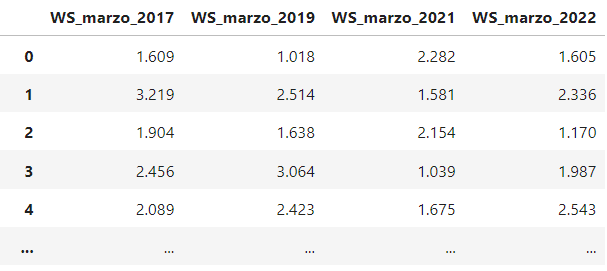

### 2.3 Concatena los archivos usando el índice como referencia. Tu df debe lucir algo como esto:

**HINT:** Para no hacerte pelotas y nombrar correctamente las columnas con su correspondiente año, puedes utilizar un argumento adicional en la importación ;)

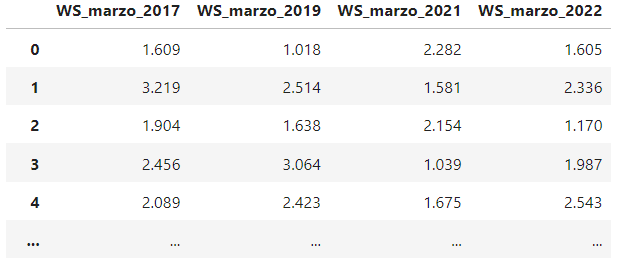

In [8]:
df_original = pd.concat(lista_df).sort_index()
# df_original
# Crear un DataFrame vacío con el índice de las horas de marzo
df_marzo = pd.DataFrame(
    index=pd.date_range(start='2020-03-01', end='2020-03-31 23:00:00', freq='h')
)

# Extraer los datos de WS para cada año
df_marzo['WS_marzo_2017'] = df_original['WSpeed_Avg']['2017-03-01':'2017-03-31'].values
df_marzo['WS_marzo_2019'] = df_original['WSpeed_Avg']['2019-03-01':'2019-03-31'].values
df_marzo['WS_marzo_2021'] = df_original['WSpeed_Avg']['2021-03-01':'2021-03-31'].values
df_marzo['WS_marzo_2022'] = df_original['WSpeed_Avg']['2022-03-01':'2022-03-31'].values

df_marzo.index = df_marzo.index.strftime('%m-%d %H:%M')

# Mostrar el nuevo DataFrame
df_marzo


,WS_marzo_2017,WS_marzo_2019,WS_marzo_2021,WS_marzo_2022
03-01 00:00,1.609,1.018,2.282,1.605
03-01 01:00,3.219,2.514,1.581,2.336
03-01 02:00,1.904,1.638,2.154,1.170
03-01 03:00,2.456,3.064,1.039,1.987
03-01 04:00,2.089,2.423,1.675,2.543
...,...,...,...,...
03-31 19:00,3.267,2.920,1.930,1.723
03-31 20:00,2.688,2.759,1.819,1.199
03-31 21:00,3.001,2.594,2.398,1.316
03-31 22:00,1.220,1.536,2.882,1.717


## Parte 3

### 3.1 Para cada año, es decir, para cada columna, ¿en qué día y hora ocurren los valores máximos? 

**HINT:** Puedes agregar una columna "dummy" que contenga una serie temporal para un mes de marzo cualquiera, al final todos los marzos son iguales 🤷🏽‍♂️

In [9]:
df_marzo.idxmax()

WS_marzo_2017    03-27 19:00
WS_marzo_2019    03-05 21:00
WS_marzo_2021    03-24 20:00
WS_marzo_2022    03-17 18:00
dtype: object

### 3.2 Calcula el promedio y la desviación estándar TOTAL de todo el dataframe

In [10]:
df_marzo.stack().mean()

np.float64(2.0472161344537816)

In [11]:
f'El promerio es = {df_marzo.stack().mean()} y la desviacion estandar es = {df_marzo.stack().std()}'

'El promerio es = 2.0472161344537816 y la desviacion estandar es = 0.8532461611053426'

### 3.3 Utiliza el criterio $$promedio+3*desviacionEstandar$$ para encontrar máximos anómalos. Para la columna correspondiente al año 2022, utiliza una función lambda para clasificar las velocidades de viento como "Normales" si están debajo de dicho criterio o "Muy altos" si son iguales o mayores. ¿Cuántos datos se clasificaron como "Normales" y cuántos como "Muy altos"?

In [12]:
df_marzo['Criterio']=df_marzo['WS_marzo_2022'].apply(lambda ws: 'Normales' if ws < df_marzo.stack().mean()+3*df_marzo.stack().std() else 'Muy_altos')
df_marzo

,WS_marzo_2017,WS_marzo_2019,WS_marzo_2021,WS_marzo_2022,Criterio
03-01 00:00,1.609,1.018,2.282,1.605,Normales
03-01 01:00,3.219,2.514,1.581,2.336,Normales
03-01 02:00,1.904,1.638,2.154,1.170,Normales
03-01 03:00,2.456,3.064,1.039,1.987,Normales
03-01 04:00,2.089,2.423,1.675,2.543,Normales
...,...,...,...,...,...
03-31 19:00,3.267,2.920,1.930,1.723,Normales
03-31 20:00,2.688,2.759,1.819,1.199,Normales
03-31 21:00,3.001,2.594,2.398,1.316,Normales
03-31 22:00,1.220,1.536,2.882,1.717,Normales


In [13]:
N_normales = df_marzo['Criterio'].str.count("Normales").sum()
N_muy_altos = df_marzo['Criterio'].str.count("Muy_altos").sum()

f'Hay {N_normales} normales y {N_muy_altos} muy altos'

'Hay 729 normales y 15 muy altos'

### 3.4 Grafica la serie temporal de WS_marzo_2022 y en la misma gráfica señala los valores identificados como "Muy altos". Si ninguno de los dos metimos la pata, la gráfica debería verse algo así:

In [14]:
df_marzo['Muy_altos']=df_marzo[['WS_marzo_2022',"Criterio"]].apply(lambda column: column['WS_marzo_2022'] if column["Criterio"]=="Muy_altos" else float('nan'), axis=1)  
df_marzo
# df[["Producto", "Costo"]].apply(lambda column: column["Producto"]+"_"+str(column["Costo"]), axis=1)  

,WS_marzo_2017,WS_marzo_2019,WS_marzo_2021,WS_marzo_2022,Criterio,Muy_altos
03-01 00:00,1.609,1.018,2.282,1.605,Normales,NaN
03-01 01:00,3.219,2.514,1.581,2.336,Normales,NaN
03-01 02:00,1.904,1.638,2.154,1.170,Normales,NaN
03-01 03:00,2.456,3.064,1.039,1.987,Normales,NaN
03-01 04:00,2.089,2.423,1.675,2.543,Normales,NaN
...,...,...,...,...,...,...
03-31 19:00,3.267,2.920,1.930,1.723,Normales,NaN
03-31 20:00,2.688,2.759,1.819,1.199,Normales,NaN
03-31 21:00,3.001,2.594,2.398,1.316,Normales,NaN
03-31 22:00,1.220,1.536,2.882,1.717,Normales,NaN


In [15]:
df_marzo.isnull().sum()

WS_marzo_2017      0
WS_marzo_2019      0
WS_marzo_2021      0
WS_marzo_2022      1
Criterio           0
Muy_altos        730
dtype: int64

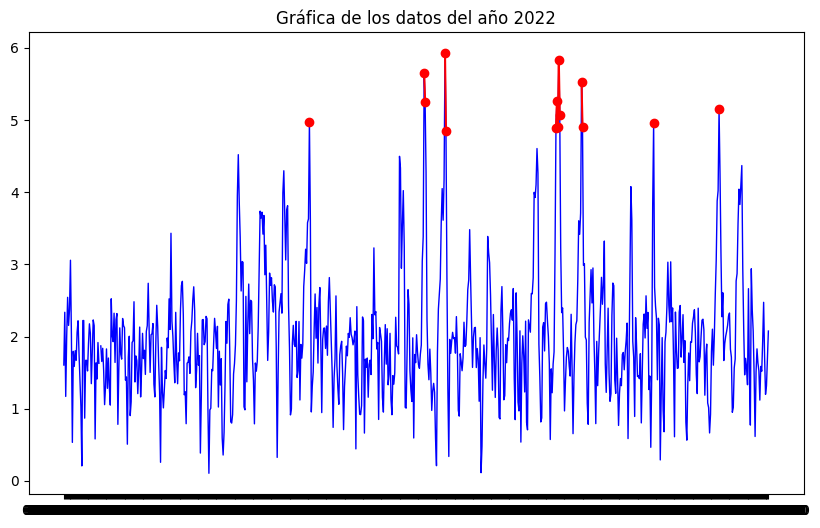

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_marzo.index, df_marzo['WS_marzo_2022'], label='Datos 2022', color='blue',linewidth=1)
plt.plot(df_marzo.index, df_marzo['Muy_altos'], label='Muy altos', color='red',marker='o')
plt.title('Gráfica de los datos del año 2022')
# plt.xlabel('Fecha')
# plt.ylabel('Valores')
# plt.grid(True)
# plt.legend()
# plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
# plt.tight_layout()  # Ajustar la gráfica para que no se sobrepongan los elementos
plt.show()

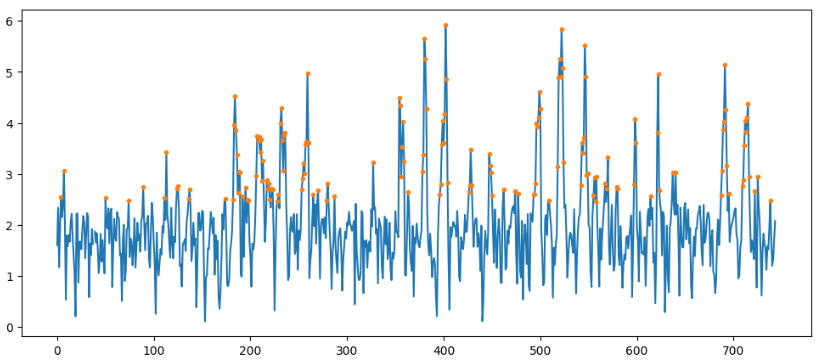

## Espero que te hayas divertido 🙂